# Data Understanding: Exploratory Data Anaylsis

### Import Relevant Libraries and Import Dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, recall_score, f1_score, roc_curve, auc

import warnings
warnings.filterwarnings('ignore')

/Applications/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('Terry_Cleaned.csv')
df.head()

Unnamed: 0 Subject Age Group Stop Resolution  Officer YOB Officer Gender  \
0           0           26 - 35          Arrest         1984              M   
1           1           26 - 35   Field Contact         1965              M   
2           2           26 - 35   Field Contact         1961              M   
3           3           26 - 35   Field Contact         1963              M   
4           4           26 - 35   Field Contact         1977              M   

                Officer Race     Subject Perceived Race  \
0  Black or African American                      Asian   
1                      White                      Other   
2                      White                      White   
3                      White                      Other   
4                      White  Black or African American   

  Subject Perceived Gender                    Officer Squad  Weapon  \
0                     Male         SOUTH PCT 1ST W - ROBERT       0   
1                     Male  TRAINING - FIELD TRAINING SQUAD       0   
2                     Male  TRAINING - FIELD TRAINING SQUAD       0   
3                     Male  TRAINING - FIELD TRAINING SQUAD       0   
4                     Male  TRAINING - FIELD TRAINING SQUAD       0   

   Call Made  Arrest Made  Frisk  Year Reported  
0          0            0      0           2015  
1          0            0      0           2015  
2          0            0      0           2015  
3          0            0      0           2015  
4          0            0      0           2015

In [3]:
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

Subject Age Group Stop Resolution  Officer YOB Officer Gender  \
0           26 - 35          Arrest         1984              M   
1           26 - 35   Field Contact         1965              M   
2           26 - 35   Field Contact         1961              M   
3           26 - 35   Field Contact         1963              M   
4           26 - 35   Field Contact         1977              M   

                Officer Race     Subject Perceived Race  \
0  Black or African American                      Asian   
1                      White                      Other   
2                      White                      White   
3                      White                      Other   
4                      White  Black or African American   

  Subject Perceived Gender                    Officer Squad  Weapon  \
0                     Male         SOUTH PCT 1ST W - ROBERT       0   
1                     Male  TRAINING - FIELD TRAINING SQUAD       0   
2                     Male  TRAINING - FIELD TRAINING SQUAD       0   
3                     Male  TRAINING - FIELD TRAINING SQUAD       0   
4                     Male  TRAINING - FIELD TRAINING SQUAD       0   

   Call Made  Arrest Made  Frisk  Year Reported  
0          0            0      0           2015  
1          0            0      0           2015  
2          0            0      0           2015  
3          0            0      0           2015  
4          0            0      0           2015

### EDA

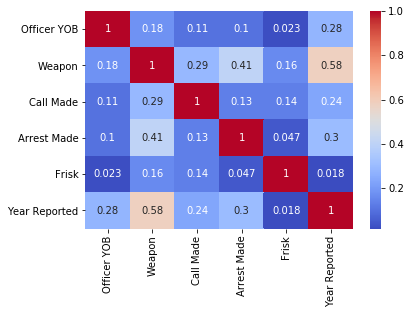

In [4]:
sns.heatmap(df.corr(), annot=True, cmap = 'coolwarm')  #Heatmap with Correlations overlaid on features.

# Scale the Heat Map, so the correlation values are centered and ledgeable
b, t = plt.ylim() # Discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() 

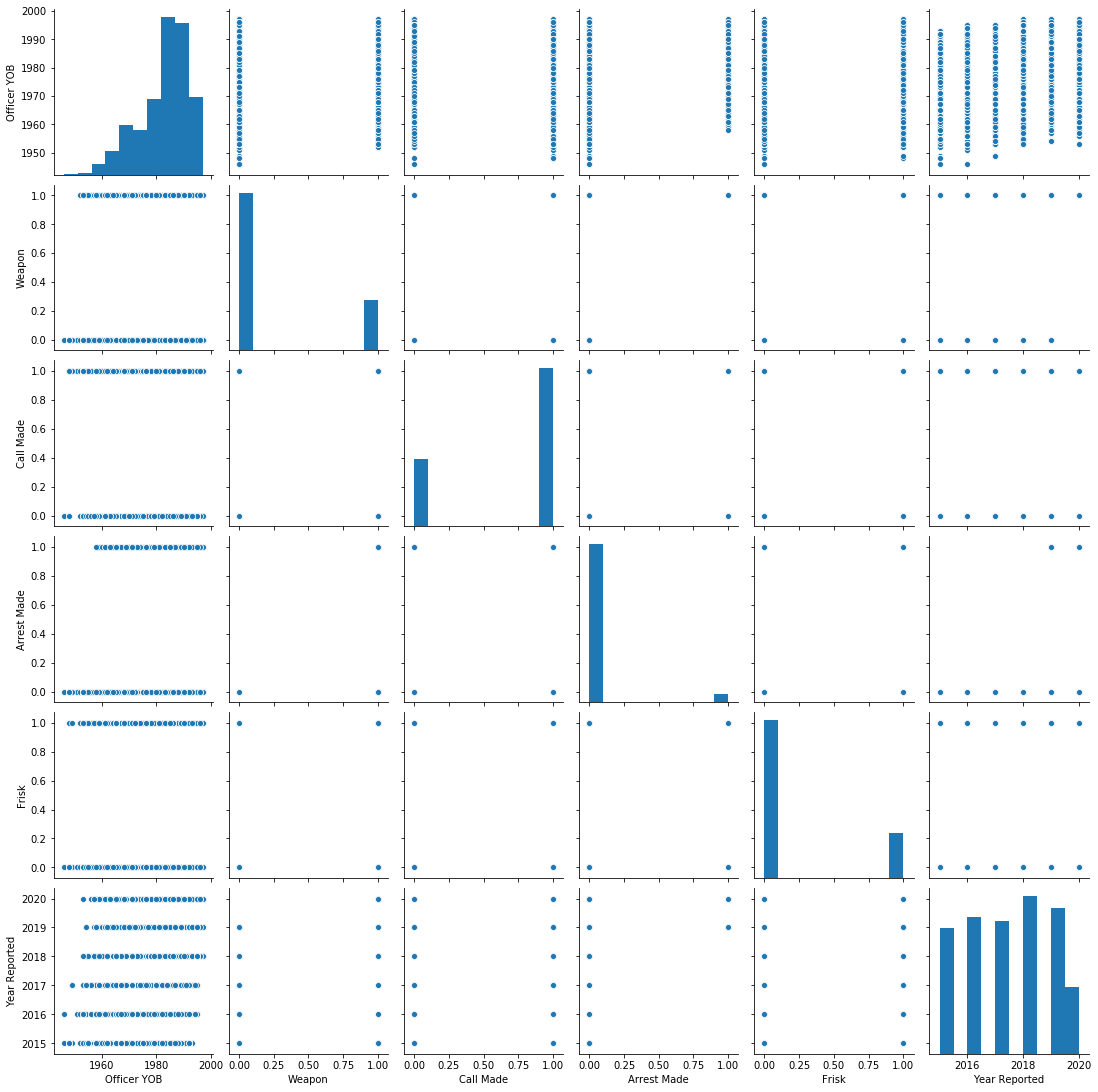

In [5]:
sns.pairplot(df)

In [6]:
# Find arrests made by white cops on minorities born before the 80's, born after the 80's
# How many arrest were made by minorities on minorities?
# Were there weapons found, but no arrests made? What race was the subject, what were the circumtances?
# which squad had the most arrests of black people?
# how many arrests resulted from Calls Made?
# how many frisks with no weapons found? How many frisks lead to arrest?

# Does community policing empower racists and the racially baised to call and report false crimes? (revist call types and source from orginal df copy) 

In [7]:
#Do a subplot (hist or bar) gender vs race in subject and officer calls and arrests
# suspicous person calls on suspects by gender and race

In [8]:
# On average how many white cops stop black people when 
# no calls are made. Is it race or age?
df.loc[(df['Officer Race'] == 'White') & (df['Subject Perceived Race'] == 'Black or African American')]

Subject Age Group Stop Resolution  Officer YOB Officer Gender  \
4               26 - 35   Field Contact         1977              M   
5               26 - 35   Field Contact         1973              M   
16              26 - 35   Field Contact         1959              M   
42              26 - 35   Field Contact         1986              M   
45              26 - 35   Field Contact         1986              M   
...                 ...             ...          ...            ...   
43045      56 and Above   Field Contact         1996              M   
43055      56 and Above   Field Contact         1976              F   
43056      56 and Above   Field Contact         1968              M   
43058      56 and Above  Offense Report         1992              M   
43059      56 and Above   Field Contact         1990              M   

      Officer Race     Subject Perceived Race Subject Perceived Gender  \
4            White  Black or African American                     Male   
5            White  Black or African American                     Male   
16           White  Black or African American                     Male   
42           White  Black or African American                     Male   
45           White  Black or African American                     Male   
...            ...                        ...                      ...   
43045        White  Black or African American                     Male   
43055        White  Black or African American                     Male   
43056        White  Black or African American                     Male   
43058        White  Black or African American                     Male   
43059        White  Black or African American                     Male   

                         Officer Squad  Weapon  Call Made  Arrest Made  Frisk  \
4      TRAINING - FIELD TRAINING SQUAD       0          0            0      0   
5      TRAINING - FIELD TRAINING SQUAD       0          0            0      0   
16         WEST PCT 2ND W - MARY BEATS       0          0            0      1   
42     TRAINING - FIELD TRAINING SQUAD       0          0            0      0   
45     TRAINING - FIELD TRAINING SQUAD       0          0            0      0   
...                                ...     ...        ...          ...    ...   
43045     NORTH PCT 3RD W - B/N RELIEF       1          1            0      0   
43055  TRAINING - FIELD TRAINING SQUAD       1          1            0      1   
43056           NORTH PCT 2ND W - NORA       1          1            0      0   
43058            WEST PCT 3RD W - KING       1          1            0      0   
43059      WEST PCT 1ST W - KING/QUEEN       1          1            0      0   

       Year Reported  
4               2015  
5               2015  
16              2015  
42              2015  
45              2015  
...              ...  
43045           2020  
43055           2020  
43056           2020  
43058           2020  
43059           2020  

[9941 rows x 13 columns]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

<Figure size 1440x1224 with 0 Axes>

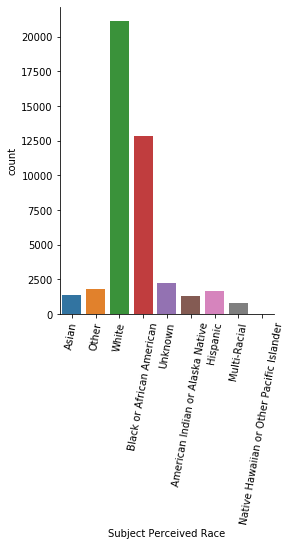

In [9]:
fig = plt.gcf()
fig.set_size_inches(20, 17)
sns.catplot(x= 'Subject Perceived Race', kind='count', data=df)
plt.xticks(rotation=80)


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

<Figure size 1440x1224 with 0 Axes>

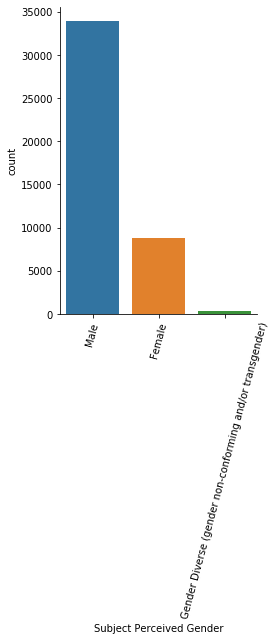

In [10]:
fig = plt.gcf()
fig.set_size_inches(20, 17)
sns.catplot(x= 'Subject Perceived Gender', kind='count', data=df)
plt.xticks(rotation=75)


In [11]:
# Does age play a part in racism or bias? 
# Is it race or age?

df.groupby(['Officer YOB', 'Officer Race', 'Subject Perceived Race']).median().head()

Weapon  Call Made  \
Officer YOB Officer Race Subject Perceived Race                         
1946        Asian        Black or African American     0.0        0.0   
                         White                         0.0        0.0   
1948        White        Asian                         0.0        1.0   
                         Black or African American     0.0        0.0   
                         Hispanic                      0.0        1.0   

                                                    Arrest Made  Frisk  \
Officer YOB Officer Race Subject Perceived Race                          
1946        Asian        Black or African American          0.0    0.0   
                         White                              0.0    0.0   
1948        White        Asian                              0.0    0.0   
                         Black or African American          0.0    0.0   
                         Hispanic                           0.0    1.0   

                                                    Year Reported  
Officer YOB Officer Race Subject Perceived Race                    
1946        Asian        Black or African American         2016.0  
                         White                             2015.0  
1948        White        Asian                             2015.0  
                         Black or African American         2015.0  
                         Hispanic                          2015.0

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

<Figure size 1440x1224 with 0 Axes>

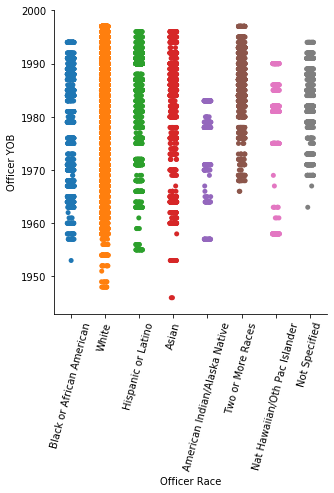

In [12]:
fig = plt.gcf()
fig.set_size_inches(20, 17)
sns.catplot(y='Officer YOB', x='Officer Race', data=df)
plt.xticks(rotation=75)


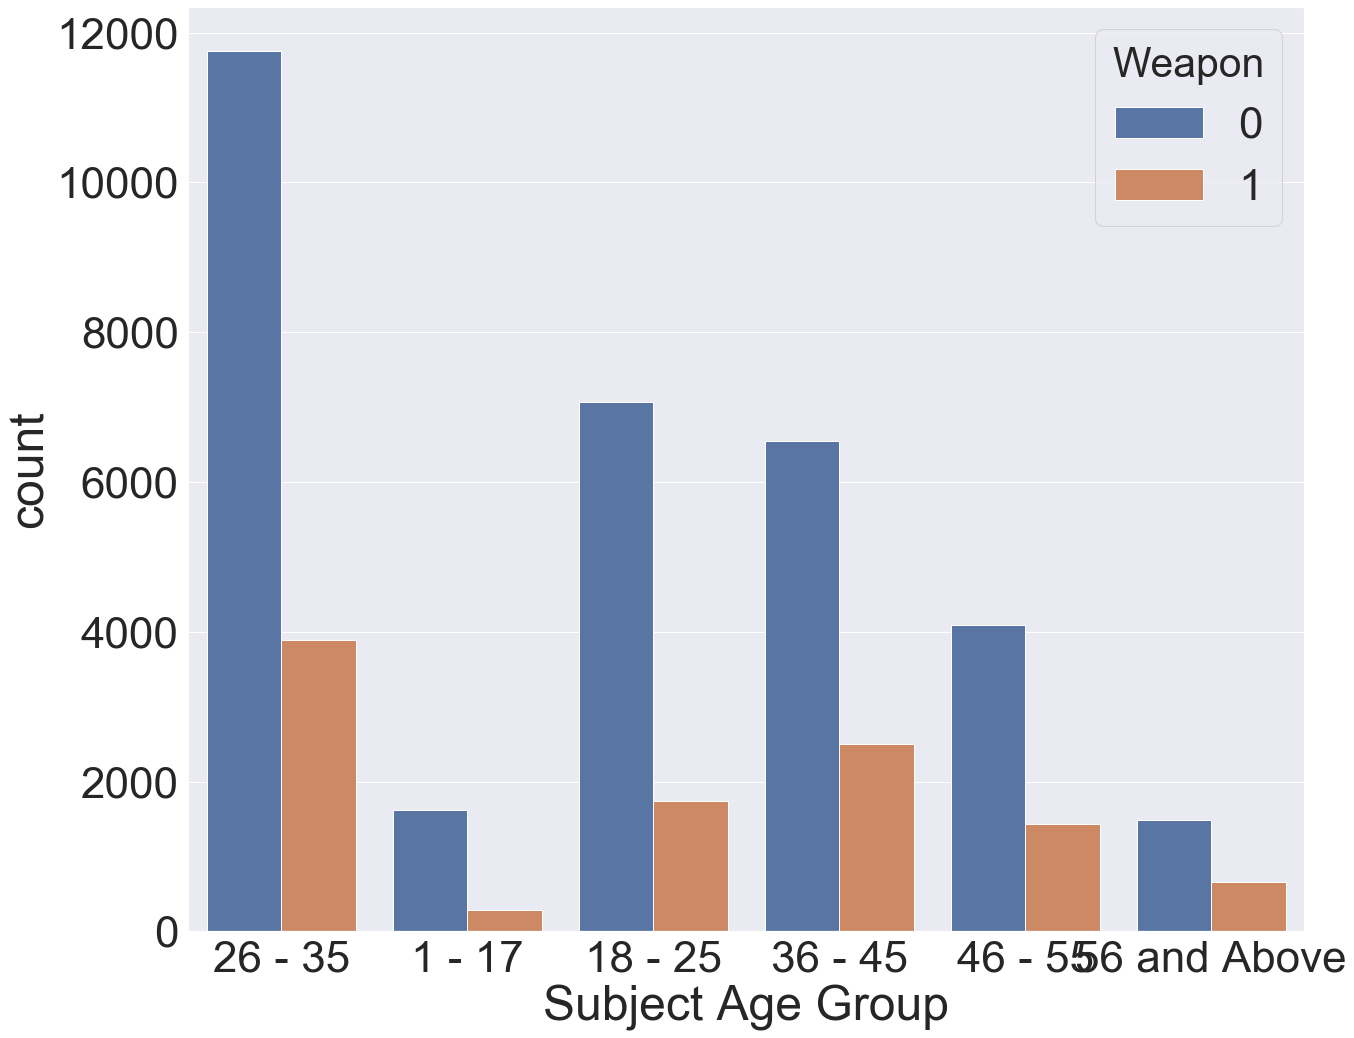

In [38]:
fig = plt.gcf()
fig.set_size_inches(20, 17)
sns.set(font_scale=4)
sns.countplot(x='Subject Age Group', hue= 'Weapon', data=df)
plt.xticks(rotation=75)

<Figure size 1440x1224 with 0 Axes>

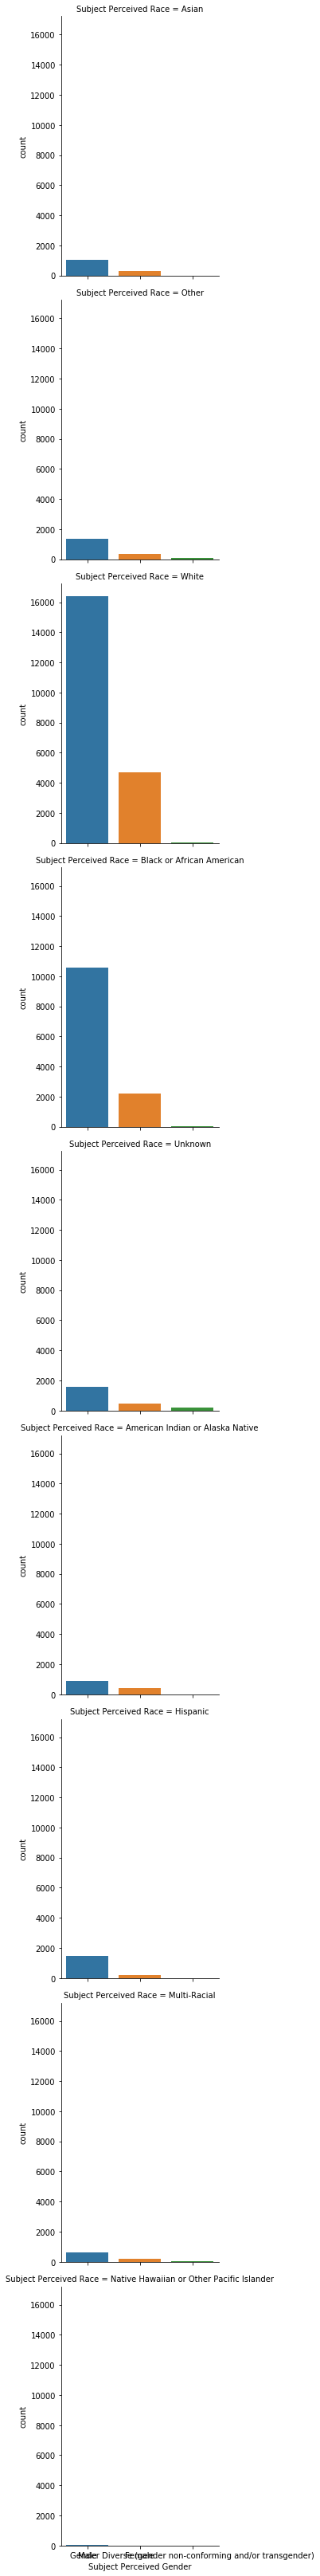

In [14]:
fig = plt.gcf()
fig.set_size_inches(20, 17)
sns.catplot("Subject Perceived Gender", col='Subject Perceived Race', col_wrap=1,
                data=df,
                kind="count")


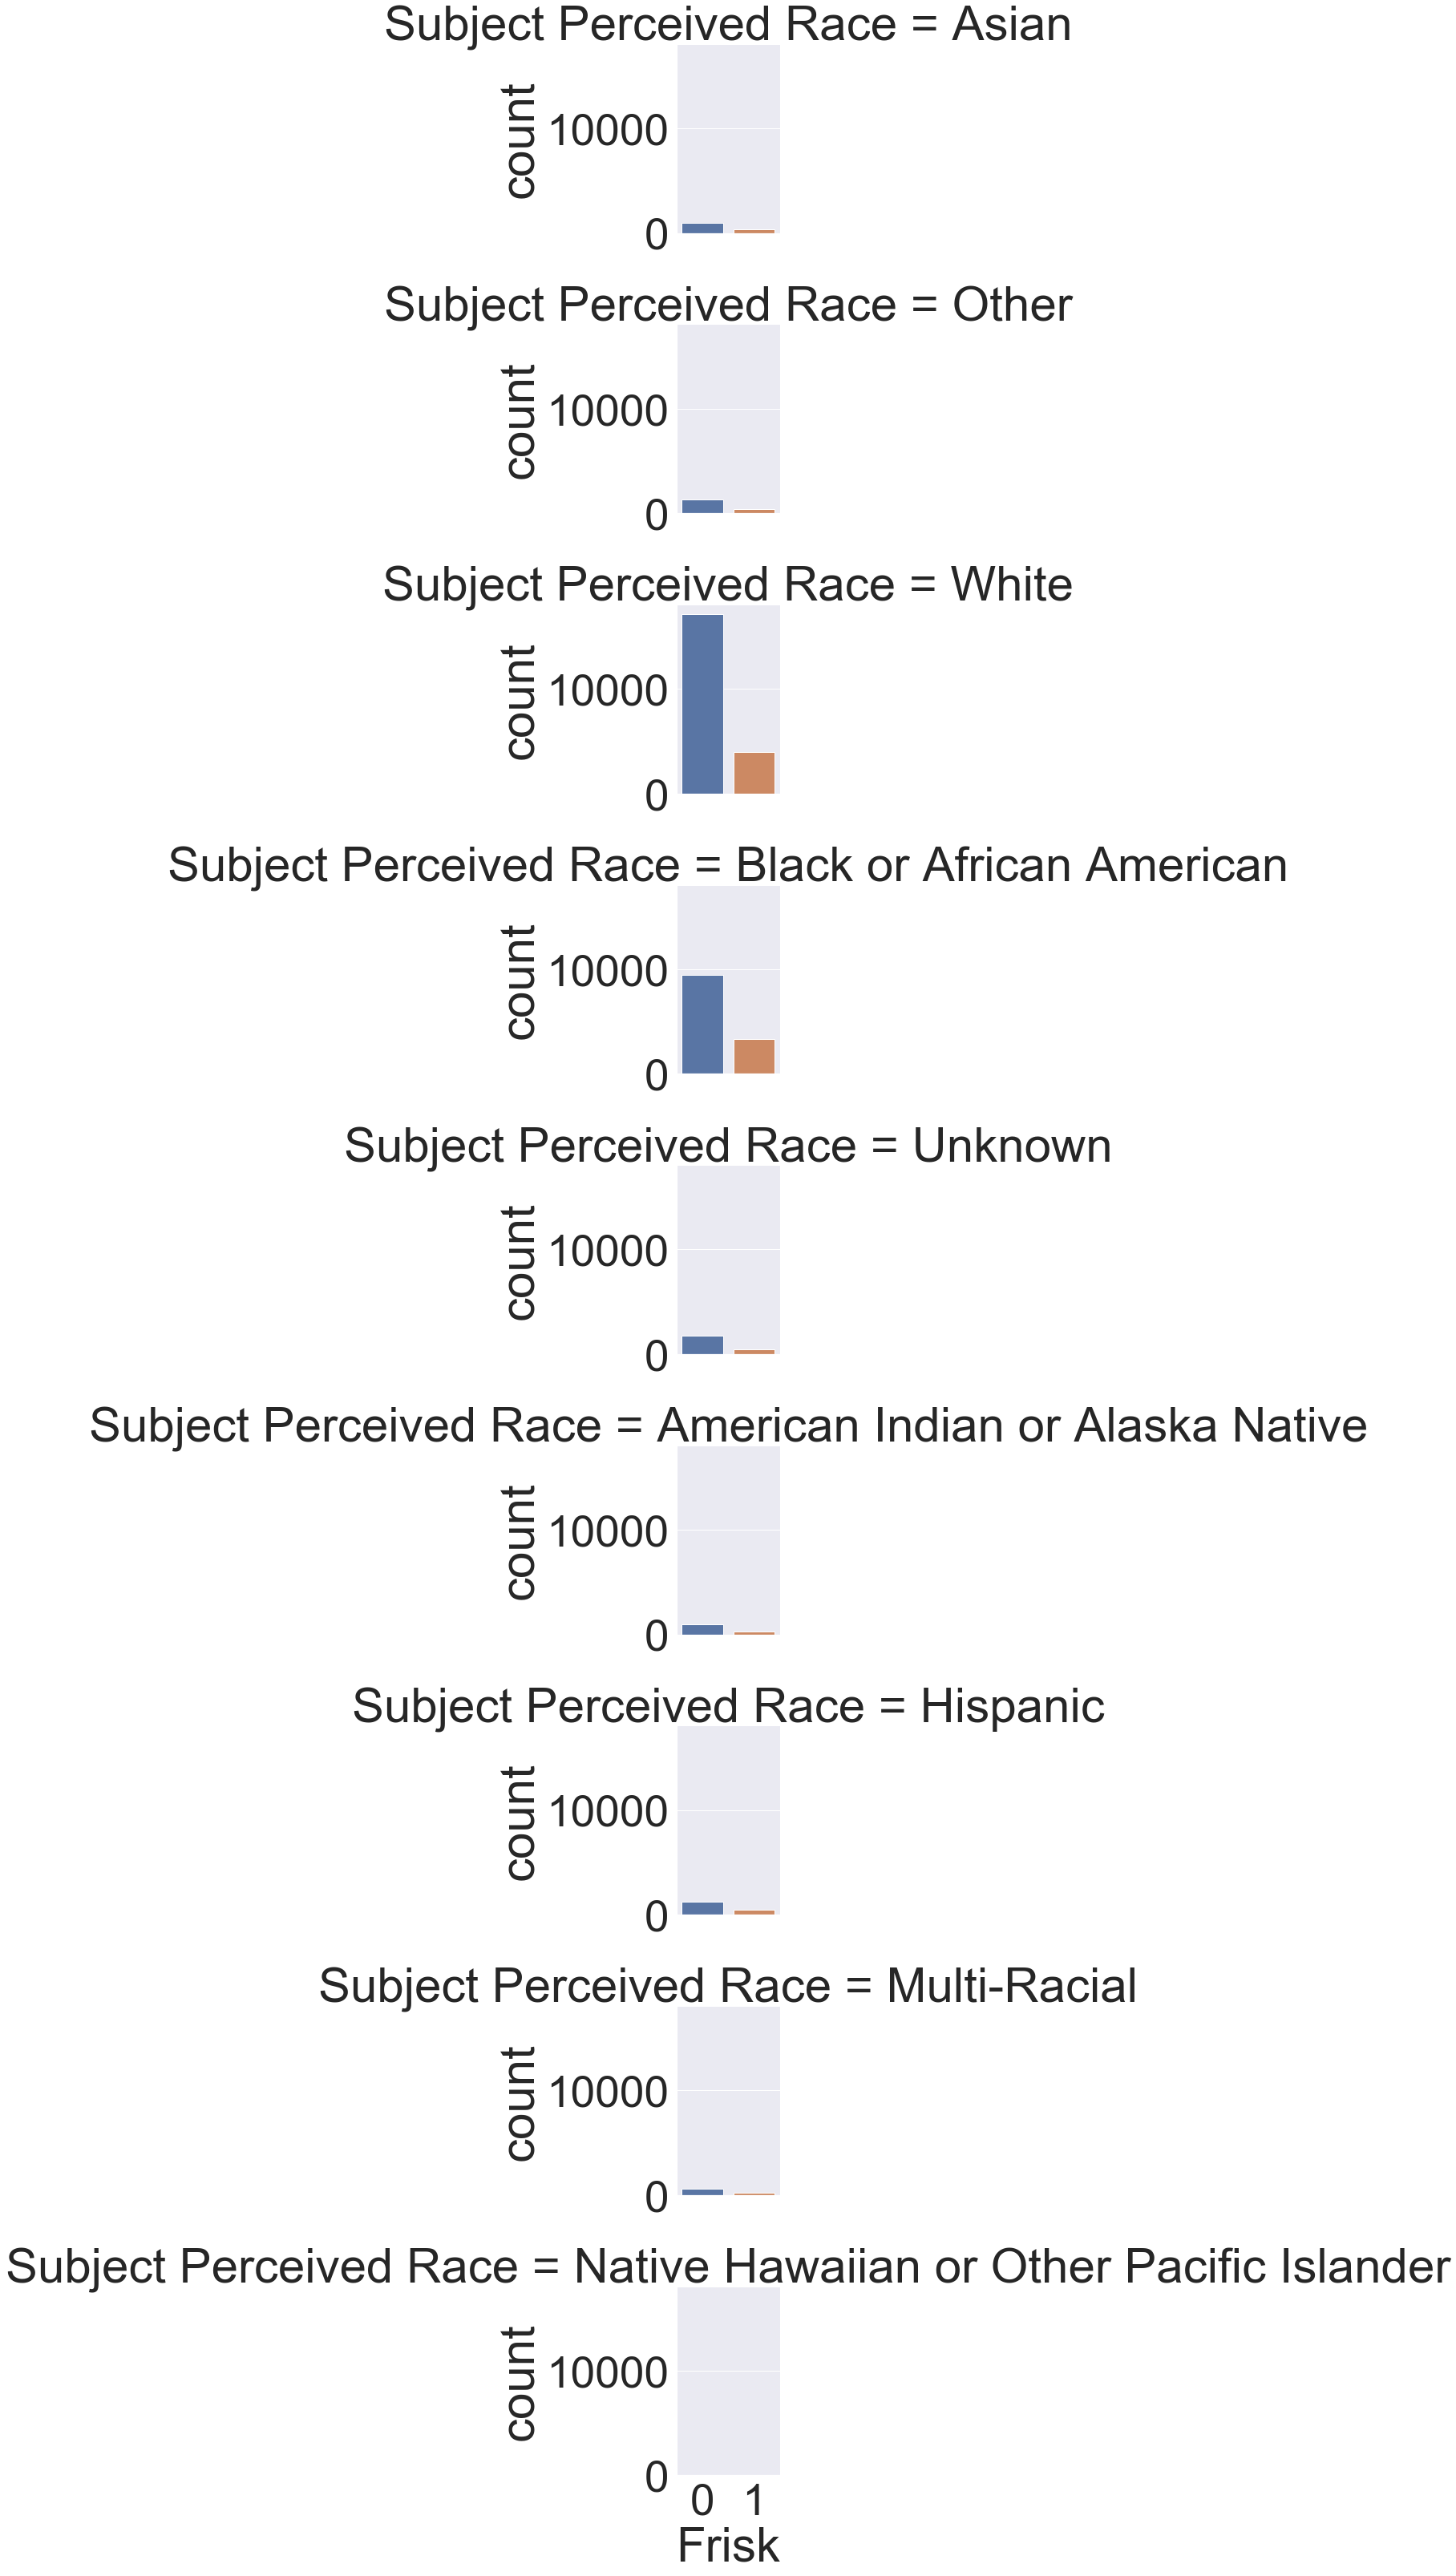

In [37]:
# # fig = plt.gcf()
# # fig.set_size_inches(20, 17)
# sns.catplot("Frisk", col='Subject Perceived Race', col_wrap=1,
#                 data=df,
#                 kind="count")




<Figure size 1440x1224 with 0 Axes>

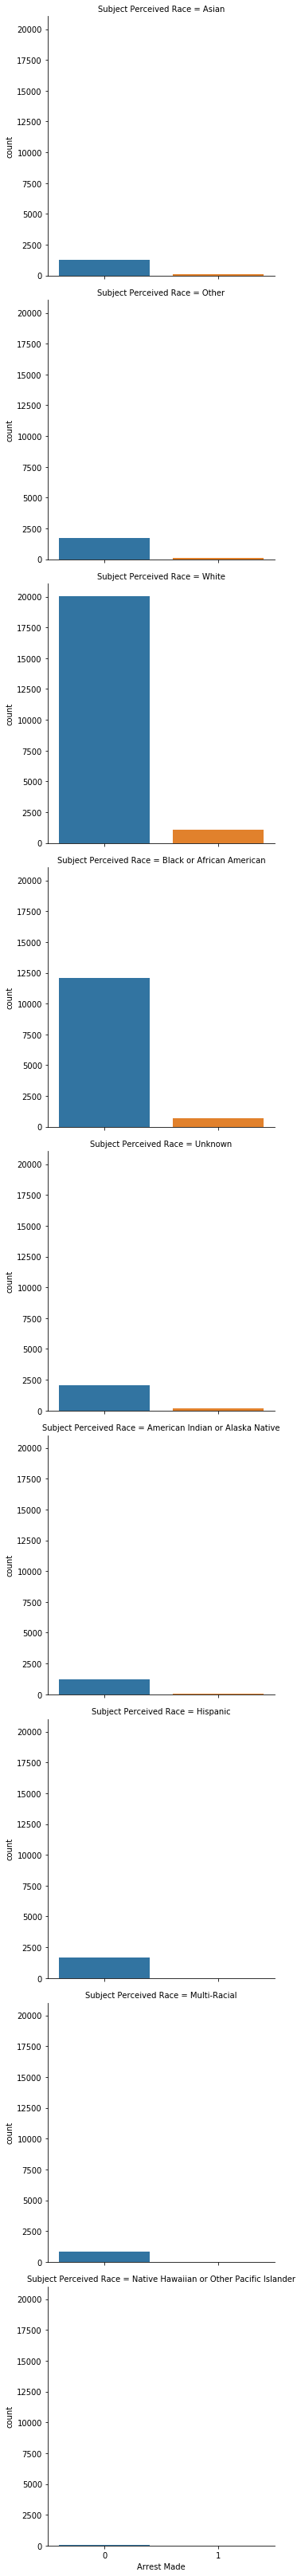

In [15]:
fig = plt.gcf()
fig.set_size_inches(20, 17)
sns.catplot("Arrest Made", col='Subject Perceived Race', col_wrap=1,
                data=df,
                kind="count")



(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

<Figure size 1440x1224 with 0 Axes>

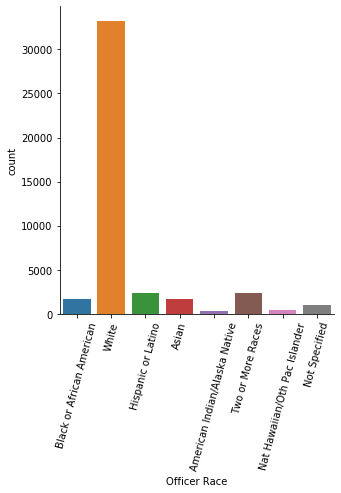

In [16]:
fig = plt.gcf()
fig.set_size_inches(20, 17)
sns.catplot(x= 'Officer Race', kind='count', data=df)
plt.xticks(rotation=75)


<Figure size 1440x1224 with 0 Axes>

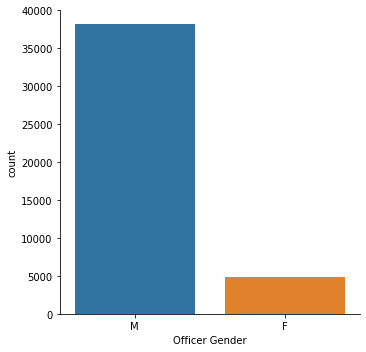

In [17]:
fig = plt.gcf()
fig.set_size_inches(20, 17)
sns.catplot(x= 'Officer Gender', kind='count', data=df)


In [18]:
# Check Officer Track record, how often are they arresting 
# minorities?

#df.groupby(['Officer ID', 'Arrest Flag']).median().head()

In [19]:
# How often do police roll up without calls being made?

df.groupby(['Officer Race', 'Subject Perceived Race', 'Call Made']).median().head()

Officer YOB  \
Officer Race                  Subject Perceived Race           Call Made                
American Indian/Alaska Native American Indian or Alaska Native 0               1964.0   
                                                               1               1979.0   
                              Asian                            0               1978.0   
                                                               1               1978.0   
                              Black or African American        0               1978.0   

                                                                          Weapon  \
Officer Race                  Subject Perceived Race           Call Made           
American Indian/Alaska Native American Indian or Alaska Native 0             0.0   
                                                               1             0.0   
                              Asian                            0             0.0   
                                                               1             0.0   
                              Black or African American        0             0.0   

                                                                          Arrest Made  \
Officer Race                  Subject Perceived Race           Call Made                
American Indian/Alaska Native American Indian or Alaska Native 0                  0.0   
                                                               1                  0.0   
                              Asian                            0                  0.0   
                                                               1                  0.0   
                              Black or African American        0                  0.0   

                                                                          Frisk  \
Officer Race                  Subject Perceived Race           Call Made          
American Indian/Alaska Native American Indian or Alaska Native 0            0.0   
                                                               1            0.0   
                              Asian                            0            0.0   
                                                               1            1.0   
                              Black or African American        0            0.0   

                                                                          Year Reported  
Officer Race                  Subject Perceived Race           Call Made                 
American Indian/Alaska Native American Indian or Alaska Native 0                 2015.0  
                                                               1                 2015.0  
                              Asian                            0                 2016.0  
                                                               1                 2018.0  
                              Black or African American        0                 2016.0

In [35]:
df.groupby(['Subject Perceived Race', 'Frisk', 'Arrest Made']).median().head()

Officer YOB  Weapon  \
Subject Perceived Race           Frisk Arrest Made                        
American Indian or Alaska Native 0     0                 1984.0     0.0   
                                       1                 1989.0     1.0   
                                 1     0                 1985.0     0.0   
                                       1                 1992.0     1.0   
Asian                            0     0                 1985.0     0.0   

                                                    Call Made  Year Reported  
Subject Perceived Race           Frisk Arrest Made                            
American Indian or Alaska Native 0     0                  1.0         2017.0  
                                       1                  1.0         2019.0  
                                 1     0                  1.0         2017.0  
                                       1                  1.0         2019.0  
Asian                            0     0                  1.0         2017.0

In [4]:
eda_df = pd.read_csv('Terry_Cleaned_forEDA.csv')
eda_df = eda_df.drop(['Unnamed: 0'], axis=1)
eda_df.head()



Subject Age Group Stop Resolution  Officer ID  Officer YOB Officer Gender  \
0           26 - 35          Arrest        7500         1984              M   
1           26 - 35   Field Contact        5670         1965              M   
2           26 - 35   Field Contact        4844         1961              M   
3           26 - 35   Field Contact        7539         1963              M   
4           26 - 35   Field Contact        6973         1977              M   

                Officer Race     Subject Perceived Race  \
0  Black or African American                      Asian   
1                      White                      Other   
2                      White                      White   
3                      White                      Other   
4                      White  Black or African American   

  Subject Perceived Gender Reported Time Initial Call Type Final Call Type  \
0                     Male      11:32:00                 -               -   
1                     Male      07:59:00                 -               -   
2                     Male      19:12:00                 -               -   
3                     Male      04:55:00                 -               -   
4                     Male      00:41:00                 -               -   

  Call Type                    Officer Squad    Beat  Weapon  Call Made  \
0         -         SOUTH PCT 1ST W - ROBERT  O2           0          0   
1         -  TRAINING - FIELD TRAINING SQUAD       -       0          0   
2         -  TRAINING - FIELD TRAINING SQUAD       -       0          0   
3         -  TRAINING - FIELD TRAINING SQUAD       -       0          0   
4         -  TRAINING - FIELD TRAINING SQUAD       -       0          0   

   Arrest Made  Frisk  Year Reported  
0            0      0           2015  
1            0      0           2015  
2            0      0           2015  
3            0      0           2015  
4            0      0           2015

In [22]:
# Go back and delete '-', test this cell block
call_null = eda_df.loc[(eda_df['Call Type'] == '-')] # Find all Call Types listed as '-'
indices_todrop = call_null.index # Find the indices 
eda_df.drop(indices_todrop, axis=0, inplace=True) # Drop the rows by index

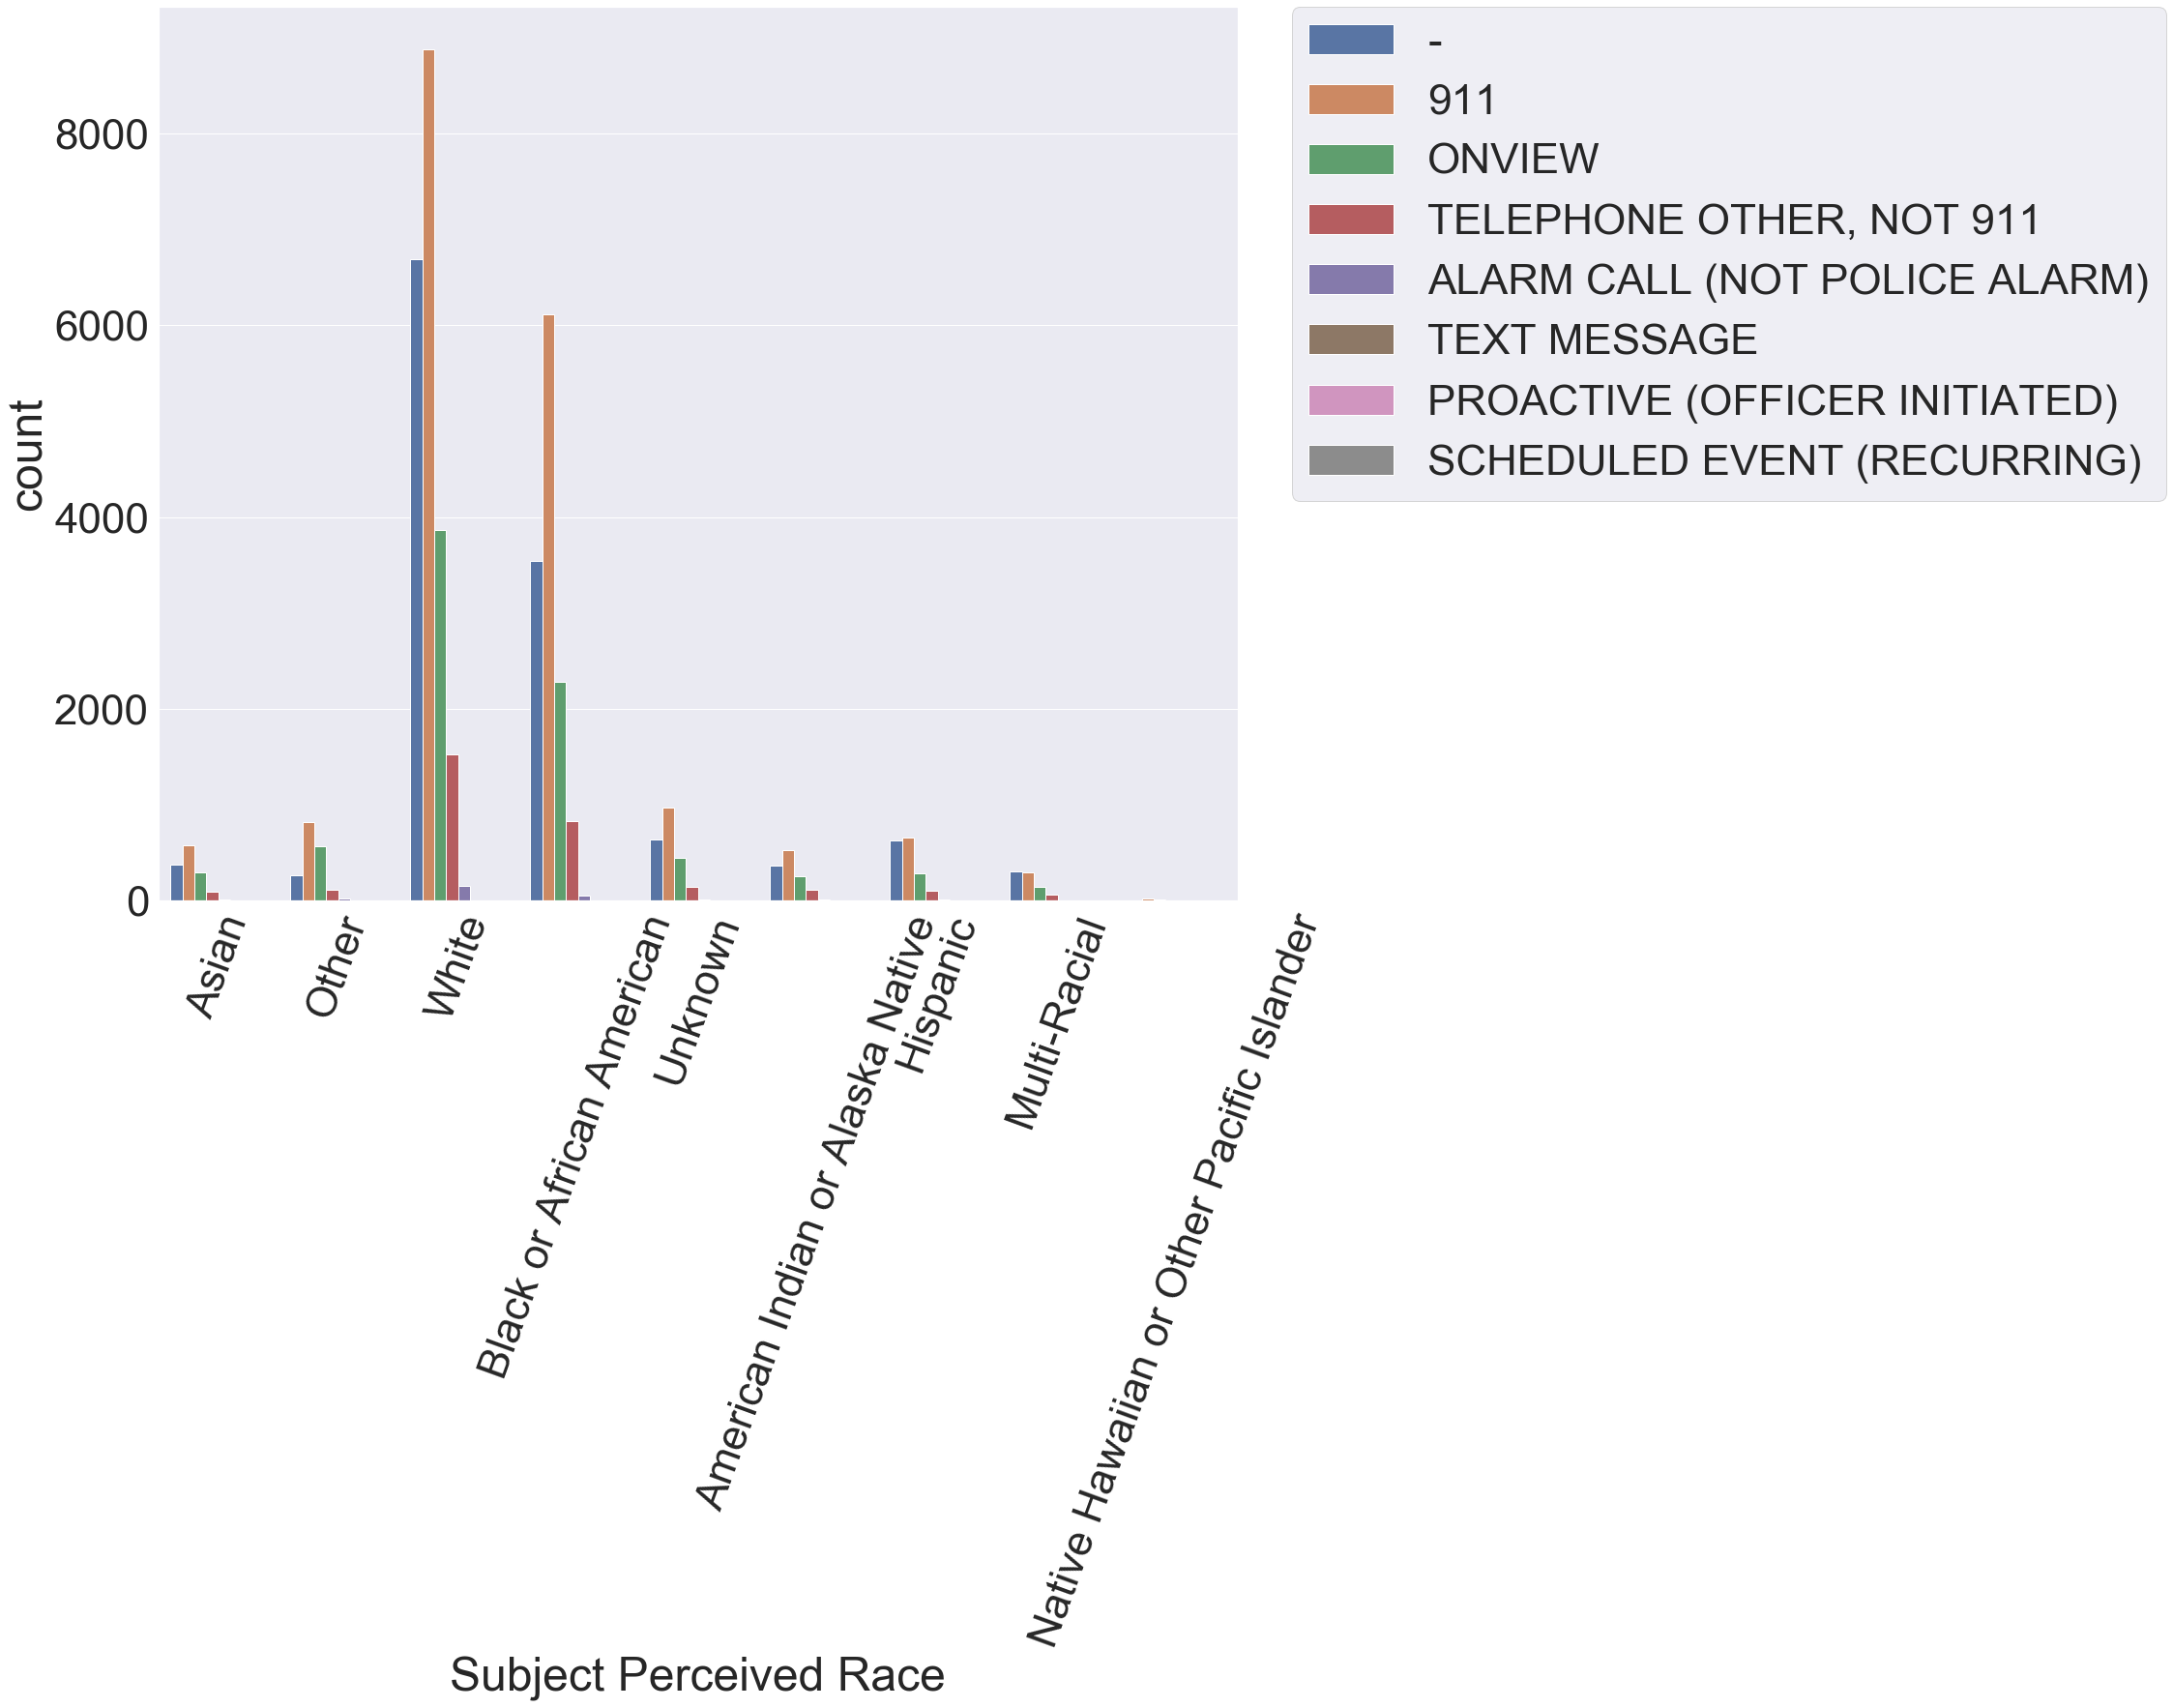

In [33]:
# Call Types by Subject Race
fig = plt.gcf()
fig.set_size_inches(20, 17)
sns.set(font_scale=4)
sns.countplot(x='Subject Perceived Race', hue='Call Type', data=eda_df)

plt.xticks(rotation=70)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


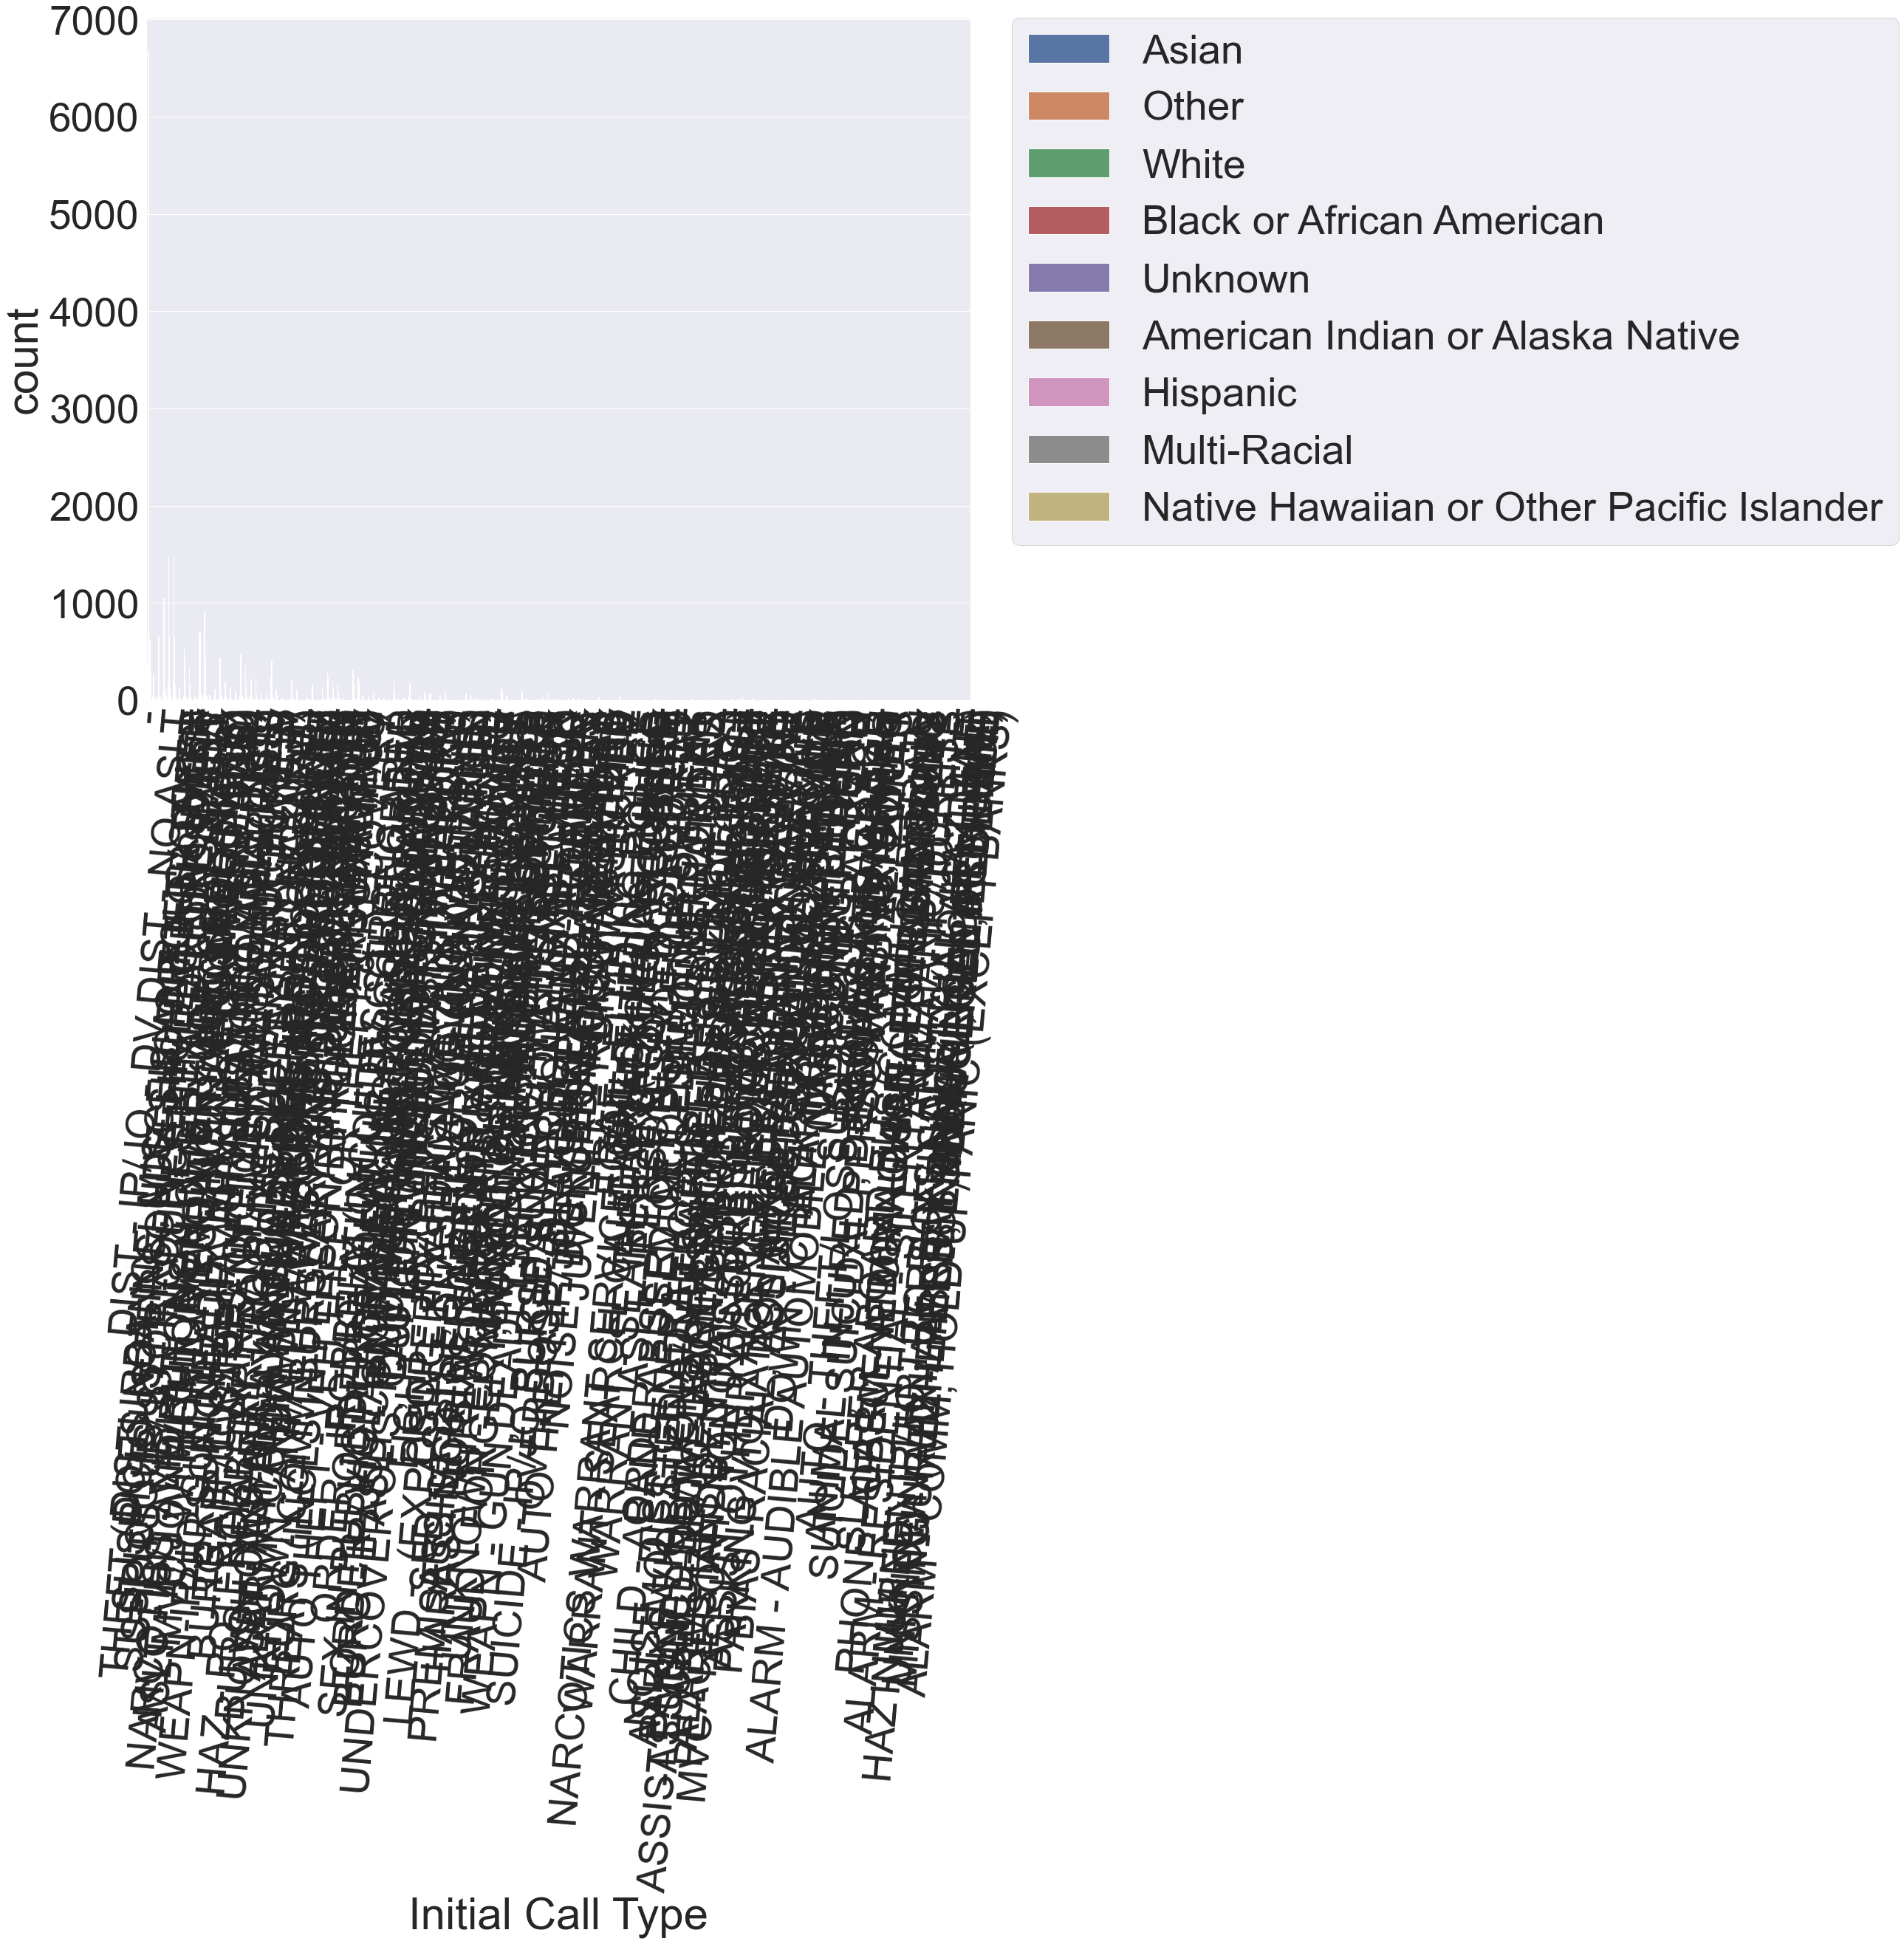

In [12]:
# show the top 15 instead
fig = plt.gcf()
fig.set_size_inches(20, 17)
sns.set(font_scale=5)
sns.countplot(hue='Subject Perceived Race', x='Initial Call Type', data=eda_df)

plt.xticks(rotation=85)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)



In [7]:
eda_df['Initial Call Type'].value_counts(normalize=True)

-                                                 0.297285
SUSPICIOUS STOP - OFFICER INITIATED ONVIEW        0.065184
SUSPICIOUS PERSON, VEHICLE OR INCIDENT            0.062072
DISTURBANCE, MISCELLANEOUS/OTHER                  0.051668
ASLT - IP/JO - WITH OR W/O WPNS (NO SHOOTINGS)    0.041613
                                                    ...   
INJURED -  PERSON/INDUSTRIAL ACCIDENT             0.000023
VICE - PORNOGRAPHY                                0.000023
DEMONSTRATIONS                                    0.000023
-ASSIGNED DUTY - STAKEOUT                         0.000023
ALARM - RESIDENTIAL - SILENT/AUD PANIC/DURESS     0.000023
Name: Initial Call Type, Length: 161, dtype: float64

In [9]:
eda_df['Initial Call Type'].unique()

array(['-', 'DIST - IP/JO - DV DIST - NO ASLT',
       'THEFT (DOES NOT INCLUDE SHOPLIFT OR SVCS)',
       'DISTURBANCE, MISCELLANEOUS/OTHER',
       'SUSPICIOUS PERSON, VEHICLE OR INCIDENT',
       'SUSPICIOUS STOP - OFFICER INITIATED ONVIEW',
       'SHOTS - IP/JO - INCLUDES HEARD/NO ASSAULT', 'SHOPLIFT - THEFT',
       'NARCOTICS - VIOLATIONS (LOITER, USE, SELL, NARS)',
       'MVC - HIT AND RUN (NON INJURY), INCLUDES IP/JO',
       'ASLT - IP/JO - WITH OR W/O WPNS (NO SHOOTINGS)', 'TRESPASS',
       'MVC - WITH INJURIES (INCLUDES HIT AND RUN)',
       'FIGHT - VERBAL/ORAL (NO WEAPONS)',
       'WEAPN-IP/JO-GUN,DEADLY WPN (NO THRT/ASLT/DIST)', 'AUTO RECOVERY',
       'PROWLER - IP/JO', 'PERSON IN BEHAVIORAL/EMOTIONAL CRISIS',
       'FIGHT - IP - PHYSICAL (NO WEAPONS)',
       'BURG - IP/JO - RES (INCL UNOCC STRUCTURES)',
       'TRAFFIC STOP - OFFICER INITIATED ONVIEW', 'NUISANCE - MISCHIEF',
       'HAZ - POTENTIAL THRT TO PHYS SAFETY (NO HAZMAT)',
       'WARRANT - MISD WARRANT P

In [10]:
eda_df['Final Call Type'].unique()

array(['-', '--DV - ARGUMENTS, DISTURBANCE (NO ARREST)',
       '--THEFT - CAR PROWL', '--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON',
       '--SEX OFFENSES (NON-RAPE) - LEWD CONDUCT', '--PROWLER - TRESPASS',
       '--WEAPON, PERSON WITH - GUN', '--THEFT - SHOPLIFT',
       '--NARCOTICS - OTHER', '--TRAFFIC - MV COLLISION INVESTIGATION',
       '--DV - DOMESTIC VIOL/ASLT (ARREST MANDATORY)',
       '--SUSPICIOUS CIRCUM. - SUSPICIOUS VEHICLE', '--ASSAULTS, OTHER',
       '--DISTURBANCE - OTHER', '--THEFT - AUTO ACCESSORIES',
       '--PROPERTY DEST (DAMG)', '--KIDNAP - GENERAL',
       '--AUTOMOBILES - RECOVERY (THEFT)', '--WARRANT SERVICES - FELONY',
       '--THEFT - BICYCLE', '--TRAFFIC - MOVING VIOLATION',
       '--WEAPON,PERSON WITH - OTHER WEAPON',
       '--ASSAULTS - HARASSMENT, THREATS', 'NUISANCE - MISCHIEF',
       '--WARRANT SERVICES - MISDEMEANOR', '--ROBBERY - STRONG ARM',
       '--THEFT - ALL OTHER',
       '--SUSPICIOUS CIRCUM. - BUILDING (OPEN DOOR, ETC)',
       '--ROB

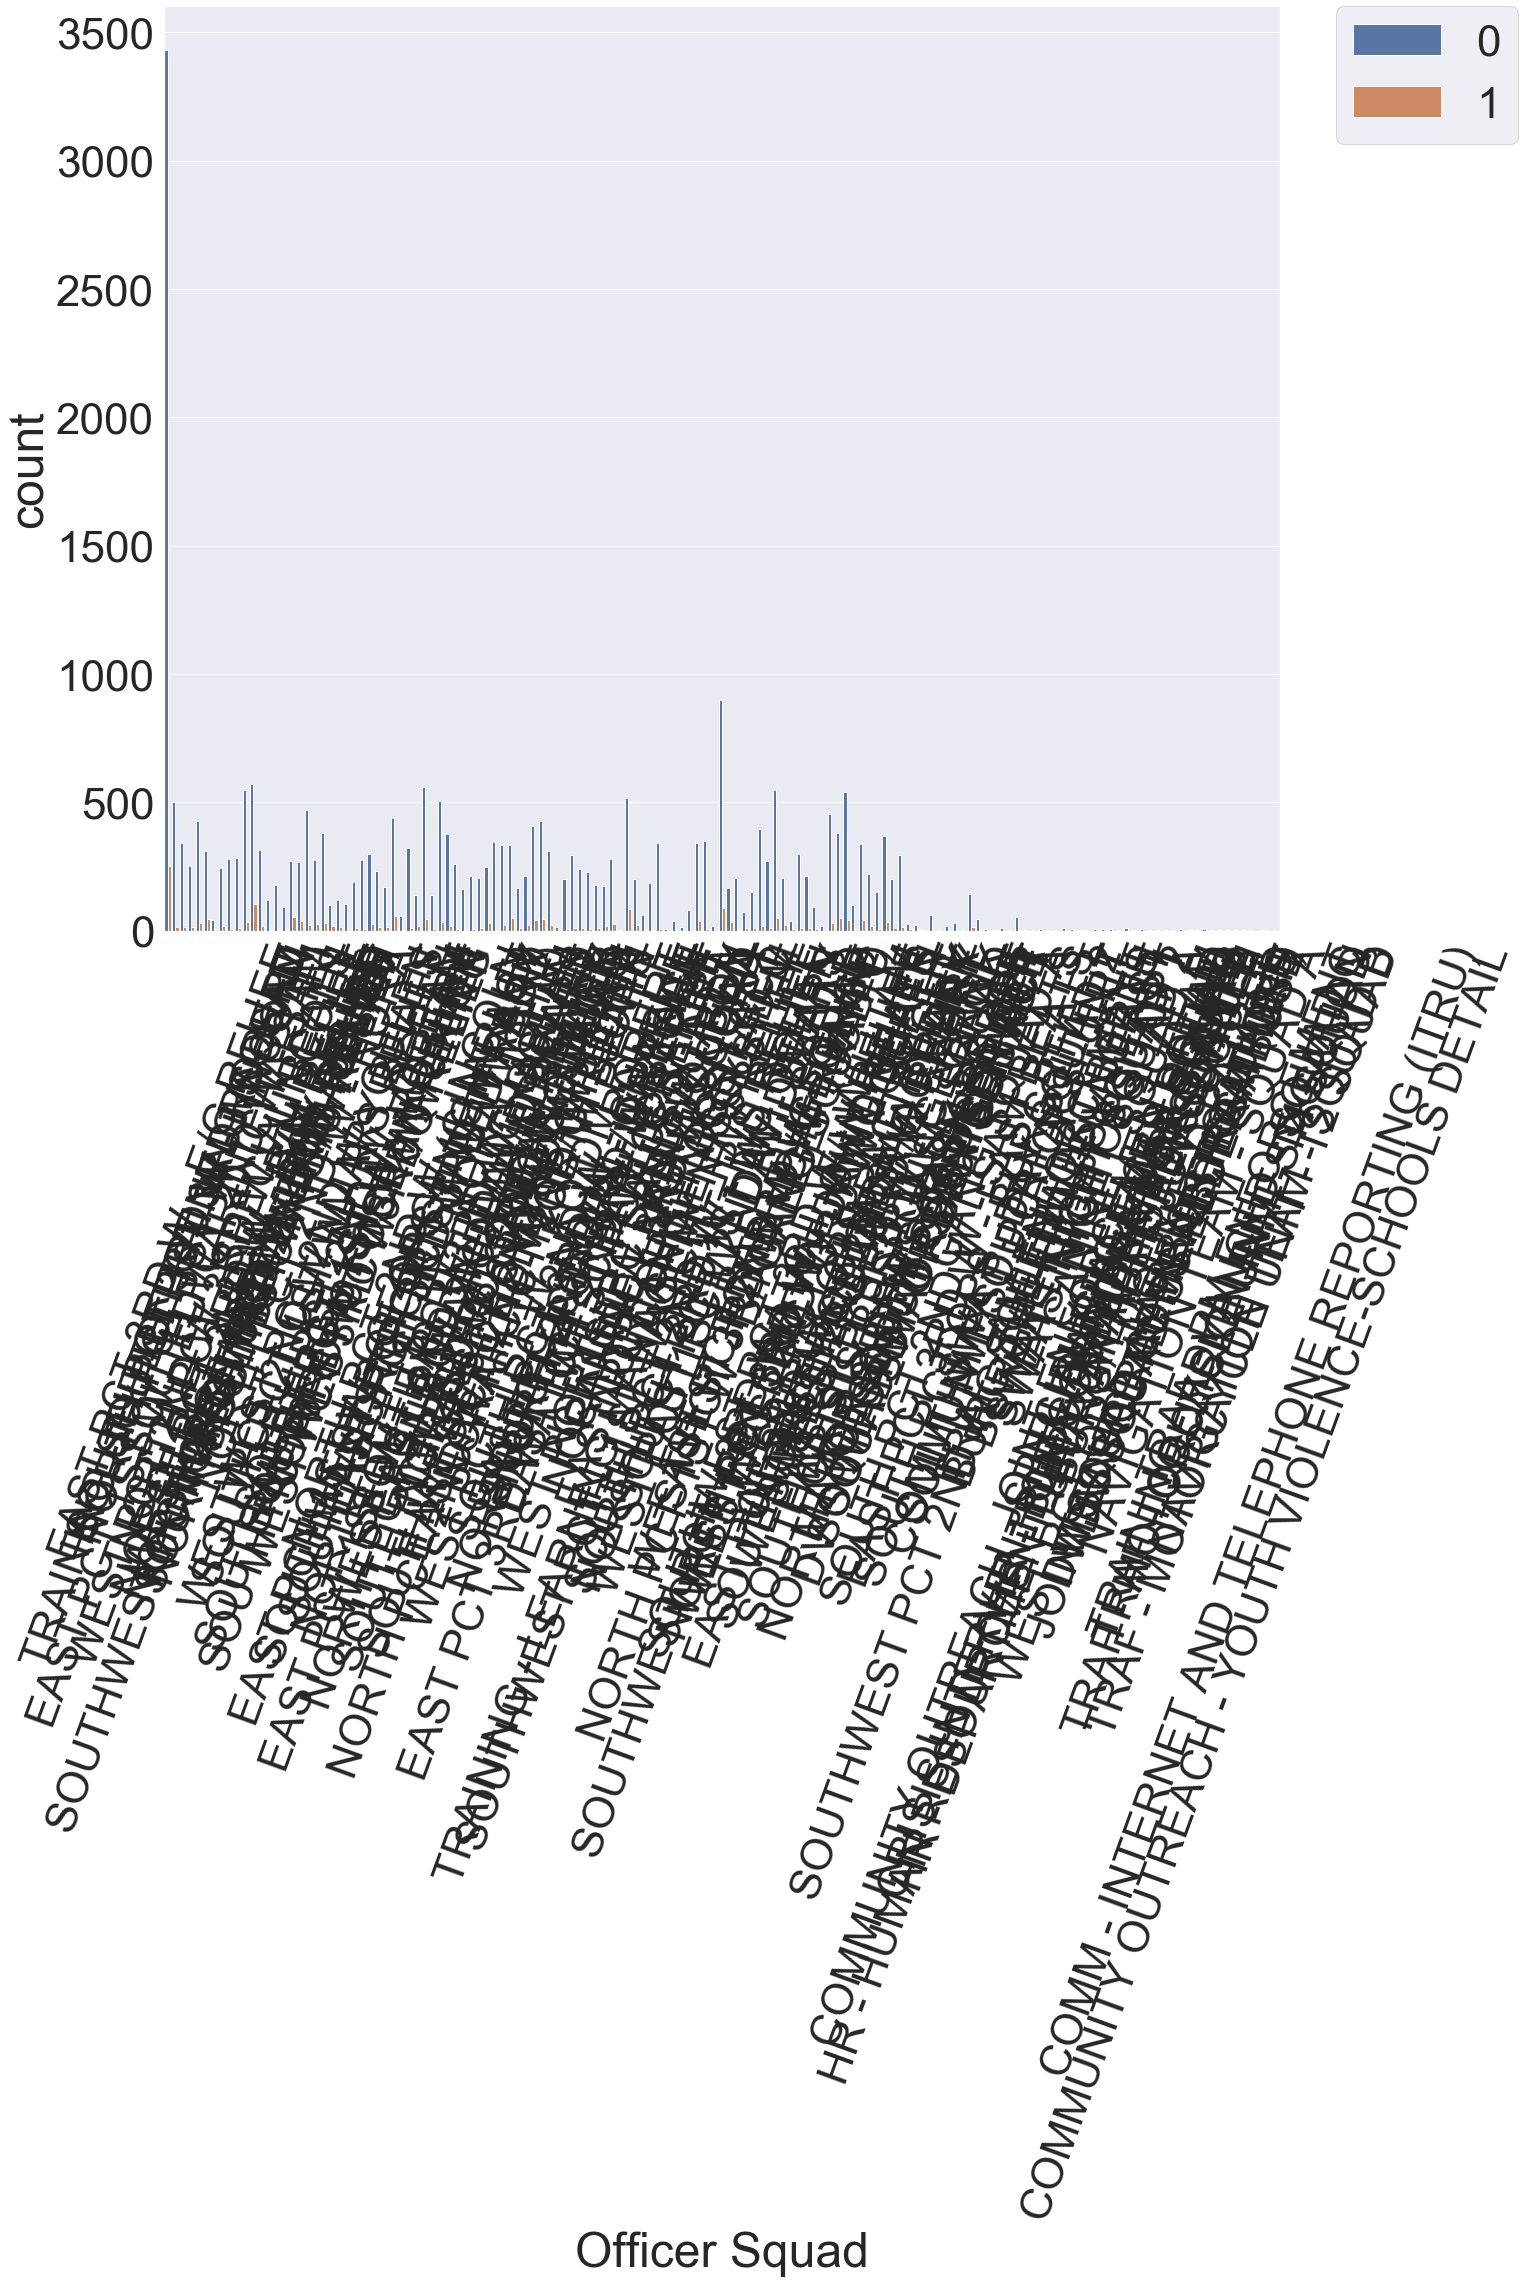

In [27]:
#show top 15
fig = plt.gcf()
fig.set_size_inches(20, 17)
sns.set(font_scale=4)
sns.countplot(x='Officer Squad', hue='Arrest Made', data=eda_df)

plt.xticks(rotation=70)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

